# Credit Fault Detection
This repo contains the Fraud Detection project as part of my data science portfolio. The objective is to detect fraudulent cases using a dataset of credit card transactions.
- Problem Statement
- Dataset
- Exploratory Data Analysis
- Supervised Machine Learning
- Discussion and Conclusion

## Problem Statement
**Credit card fraud detection** is when a business takes steps to prevent stolen money, products, or services obtained via an illegitimate credit card transaction. Credit card fraud can happen both by the cardholder themselves or by someone else. There are many ways a business can detect credit card fraud, which we’ll go over in a bit. 
#### Why fraud detection is important?
In 2018 alone, there were more than 200,000 breached credit card accounts. How much does credit card fraud cost businesses? In 2018, merchants lost \\$2.94 in revenue for every \\$1 in fraud. On the note of card-not-present (CNP) fraud, the most prevalent and costly: The average CNP transaction in the U.S. was \\$403 in Q1 2019. And according to the NRF, fraud is the top payment-related challenge retailers have in their business. In short: Credit card fraud is rampant, expensive, and harmful to your bottom line.

[credicts: https://paymentdepot.com/blog/credit-card-fraud-detection]

## Dataset
The dataset used in this project is downloaded from [Kaggle.](https://www.kaggle.com/mlg-ulb/creditcardfraud)

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly **unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Exploratory Data Analysis

In [2]:
# import numpy and pandas
import numpy as np
import pandas as pd

# to plot within notebook
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
# load the dataset
df = pd.read_csv("data/creditcard.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# explore the features available in the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# count the occurrences of fraud and no fraud cases
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

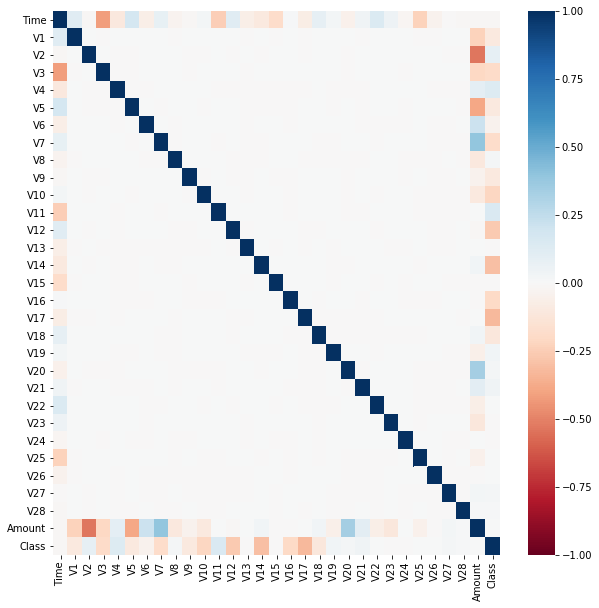

In [6]:
# Checking for strong colinearity using heatmap.
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap="RdBu", ax=ax)

 I dodn’t feel that the colinearity is high enough for any atttribute, to run the risk of multicollinearity.

## Supervised Machine Learning
When we have labelled data, we can use supervised machine learning techniques to flag fraudulent transactions. We can use classifiers, adjust them and compare them to find the most efficient fraud detection model.

In [32]:
# create input and target variable
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [33]:
# create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Data Resampling

To deal with class imbalance, we can either undersample the majority class (non-fraud cases) or oversample the minority class (fraud cases). But there are drawbacks. With undersampling, we are throwing away a lot of data and information. With oversampling, we are copying data and creating duplicates. **SMOTE (Synthetic Minority Over-sampling Technique)** is a better way of adjusting class imbalance by oversampling minority class. With SMOTE, we are not just copying monitority class, SMOTE uses characteristics of nearest neighbours of fraud cases to create new synthetic fraud cases and avoid duplicates. But it only works well if the fraud cases are quite similar to each other. If fraud is spread out over the data and not very distinct, using nearest neighbours to create more fraud cases introduces a bit of noise in the data, as the nearest neighbours might not necessarily be fraud cases.

**NOTE:** Use resampling methods on training set, never on test set. Always make sure the test set is free of duplicate or synthetic data.

In [17]:
# import SMOTE
from imblearn.over_sampling import SMOTE
import imblearn
print(imblearn.__version__)

# Define the resampling method
method = SMOTE()

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X_train, y_train)

0.6.1


In [18]:
# check before and after resample
print("Before resampling:\n{}\n".format(y_train.value_counts()))
print("After resampling:\n{}\n".format(pd.Series(y_resampled).value_counts()))

Before resampling:
0    199019
1       345
Name: Class, dtype: int64

After resampling:
1    199019
0    199019
Name: Class, dtype: int64



Unlike Random Over-sampling, SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar to the existing observations in the minority class. SMOTE is therefore slightly more sophisticated than just copying observations. We can then fit the resampled training data into a machine learning model and make prediction on the non-resampled test data.

### Logistic Regression (using SMOTE)

Accuracy Score: 0.9842702152312067

ROC score: 0.9648668837259158

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.09      0.88      0.16       147

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.58     85443
weighted avg       1.00      0.98      0.99     85443


Confusion matrix:
[[83969  1327]
 [   17   130]]



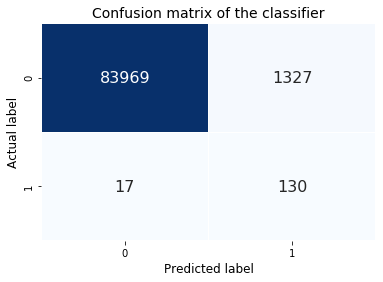

In [34]:
# fit the model
model = LogisticRegression(solver="liblinear")
model.fit(X_resampled, y_resampled)

# make predictions
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# print the accuracy score
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted)))

# print the ROC score
print("ROC score: {}\n".format(roc_auc_score(y_test, probs[:,1])))

# print the classifcation report and confusion matrix
print("Classification report:\n{}\n".format(classification_report(y_test, predicted)))

# print confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print("Confusion matrix:\n{}\n".format(conf_mat))

# plot the confusion matrix
sns.heatmap(conf_mat, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("cm.png", bbox_inches="tight")
plt.show()

As seen above, we managed to catch 130 out of 147 fraud cases with 17 false negative. However, we have a slightly higher number of false positives, 1327. Not bad for our first machine learning model. When the fraud cases are very spread and scattered over the data, using SMOTE can introduce a bit of bias, so the synthetic samples might 'confuse' the model slightly.

### Random Forest
Accuracy can be misleading in the case of fraud detection. A model with no predictive power and just predict everything as non-fraud will have high accuracy. That does not mean it is a good model. With highly imbalanced fraud data, we need to look at **Precision**, **Recall** and the **AUC ROC curve**. These are more reliable performance metric, used to compare different classifiers.

To understand Precision and recall, we need to understand False negative and False positive. 
- False negative - predicted no fraud but actually there is fraud. 
- False positive - false alarm, predicted fraud but actually no fraud. 

Different companies implementing fraud detection may focus on different aspect. For example, Banks and Insurance companies may have different focus.

Banks may want to minimize false negative, catch as many fraud as possible, because fraud credit card transactions can cost alot of money, they don't mind false positive because it just means stopping the transaction. Therefore banks may want to optimize for Recall, as high as possible, means out of all actual fraud cases, as many as possible are flagged, achieving a high percentage of predicted fraud cases out of all actual fraud cases.

On the other hand, insurance companies may want to minimize false positive, i.e. minimize false alarm, because high false alarm would mean incur huge resources of assembling a team of investigators to go through each flagged fraud case. Thus, insurance companies may want to optimize for Precision, as high as possible, achieving a high percentage of actual fraud cases out of all predicted fraud cases .

Since for fraud detection we are mostly interested in catching as many fraud cases as possible, we can optimize our model settings to get the best possible Recall score. If we also cared about reducing the number of false positives, we could optimize on **F1-score**, this gives us that nice Precision-Recall trade-off.

In the following section, we'll create our first random forest classifier for fraud detection. That will serve as the "baseline" model that we're going to try to improve.

In [64]:
# create input and target variable
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [65]:
# create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
l = len(y_test)
print("len: ", l)
c = 0
for i in y_test:
    if(i == 1):
        c += 1
print("1: ",c)
print("0: ",(l-c))

len:  56962
1:  101
0:  56861


#### GridSearchCV to find optimal parameters
With GridSearchCV we can define which performance metric to score the options on. Since for fraud detection we are mostly interested in catching as many fraud cases as possible, we can optimize our model settings to get the best possible Recall score. If we also cared about reducing the number of false positives, we could optimize on F1-score, this gives us that nice Precision-Recall trade-off.

In [72]:
%%time
# define the parameter sets to test
param_grid = {"n_estimators": [10, 30, 50], 
              "max_features": ["auto", "log2"],  
              "max_depth": [4, 8], 
              "criterion": ["gini", "entropy"], 
              "class_weight": [None, {0:1, 1:12}, {0:1, 1:20}]
}

# define the model to use
model = RandomForestClassifier(random_state=0)

# combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="recall", n_jobs=-1)

# fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)

Wall time: 14min 41s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [73]:
# show best parameters
CV_model.best_params_

{'class_weight': {0: 1, 1: 20},
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 30}

Accuracy Score: 0.9993679997191109

ROC score = 0.978020049239408

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.84      0.79      0.82       101

    accuracy                           1.00     56962
   macro avg       0.92      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56846    15]
 [   21    80]]


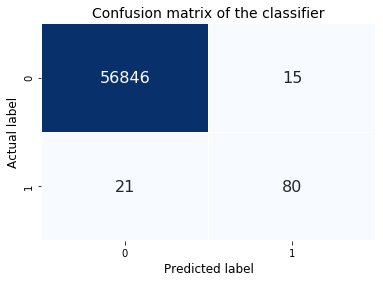

In [74]:
# obtain predictions from the test data 
predicted = CV_model.predict(X_test)

# predict probabilities
probs = CV_model.predict_proba(X_test)

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted)))
print("ROC score = {}\n".format(roc_auc_score(y_test, probs[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predicted)))
conf_mat = confusion_matrix(y_test, predicted)
print("Confusion Matrix:\n",conf_mat)

# plot the confusion matrix
sns.heatmap(conf_mat, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("cm.png", bbox_inches="tight")
plt.show()

### Logistic Regression 

Accuracy Score: 0.9986833327481479

ROC score = 0.9728526800025282

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.59      0.83      0.69       101

    accuracy                           1.00     56962
   macro avg       0.80      0.92      0.85     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56803    58]
 [   17    84]]


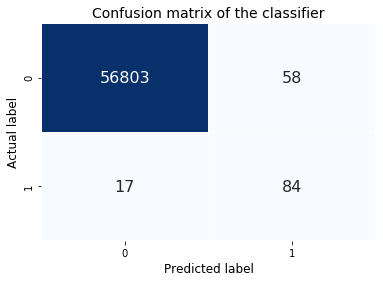

In [75]:
# define the Logistic Regression model with weights
lr_model = LogisticRegression(class_weight={0:1, 1:20}, random_state=0, solver="liblinear")

# fit the model to our training data
lr_model.fit(X_train, y_train)

# obtain predictions from the test data 
predicted = lr_model.predict(X_test)

# predict probabilities
probs = lr_model.predict_proba(X_test)

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted)))
print("ROC score = {}\n".format(roc_auc_score(y_test, probs[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predicted)))
conf_mat = confusion_matrix(y_test, predicted)
print("Confusion Matrix:\n",conf_mat)

# plot the confusion matrix
sns.heatmap(conf_mat, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("cm.png", bbox_inches="tight")
plt.show()

### Decision Tree

Accuracy Score: 0.9992626663389628

ROC score = 0.8958549431208047

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.79      0.79      0.79       101

    accuracy                           1.00     56962
   macro avg       0.90      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56840    21]
 [   21    80]]


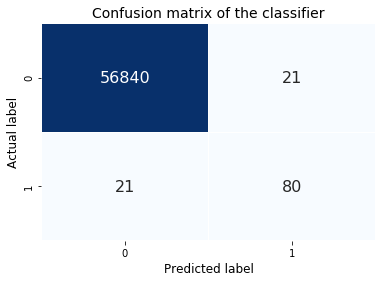

In [76]:
# define the Decision Tree model with balanced weight
tree_model = DecisionTreeClassifier(random_state=0, class_weight={0:1, 1:20})

# fit the model to our training data
tree_model.fit(X_train, y_train)

# obtain predictions from the test data 
predicted = tree_model.predict(X_test)

# predict probabilities
probs = tree_model.predict_proba(X_test)

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted)))
print("ROC score = {}\n".format(roc_auc_score(y_test, probs[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predicted)))
conf_mat = confusion_matrix(y_test, predicted)
print("Confusion Matrix:\n",conf_mat)

# plot the confusion matrix
sns.heatmap(conf_mat, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("cm.png", bbox_inches="tight")
plt.show()

### Voting Classifier
Let's now combine three machine learning models into one, to improve our Random Forest fraud detection model from before. We'll combine our usual Random Forest model, with the Logistic Regression and Decision Tree model from the previous section.

#### Adjust weights within the Voting Classifier
Voting Classifier allows us to improve our fraud detection performance, by combining good aspects from multiple models. We will try to adjust the weights we give to these models. By increasing or decreasing weights we can play with how much emphasis we give to a particular model relative to the rest. This comes in handy when a certain model has overall better performance than the rest, but we still want to combine aspects of the others to further improve our results.

In [77]:
# define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:20}, random_state=0, solver="liblinear")
clf2 = RandomForestClassifier(class_weight={0:1,1:20}, criterion='entropy', n_estimators=50, max_features='log2', 
                              max_depth=4, n_jobs=-1, random_state=0)
clf3 = DecisionTreeClassifier(random_state=0, class_weight={0:1, 1:20})

# combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[("lr", clf1), ("rf", clf2), ("gnb", clf3)], voting="soft", 
                                  weights=[1,4,1], flatten_transform=True)

Accuracy Score: 0.999420666409185

ROC score = 0.9794877590149054

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.85      0.81      0.83       101

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56847    14]
 [   19    82]]


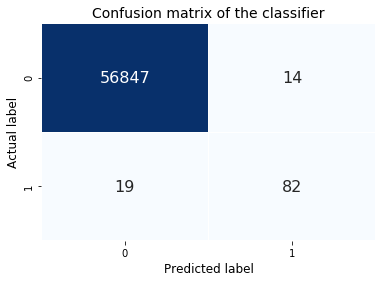

In [78]:
ensemble_model.fit(X_train, y_train)
predicted = ensemble_model.predict(X_test)
probs = ensemble_model.predict_proba(X_test)

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted)))
print("ROC score = {}\n".format(roc_auc_score(y_test, probs[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predicted)))
conf_mat = confusion_matrix(y_test, predicted)
print("Confusion Matrix:\n",conf_mat)

# plot the confusion matrix
sns.heatmap(conf_mat, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("cm.png", bbox_inches="tight")
plt.show()

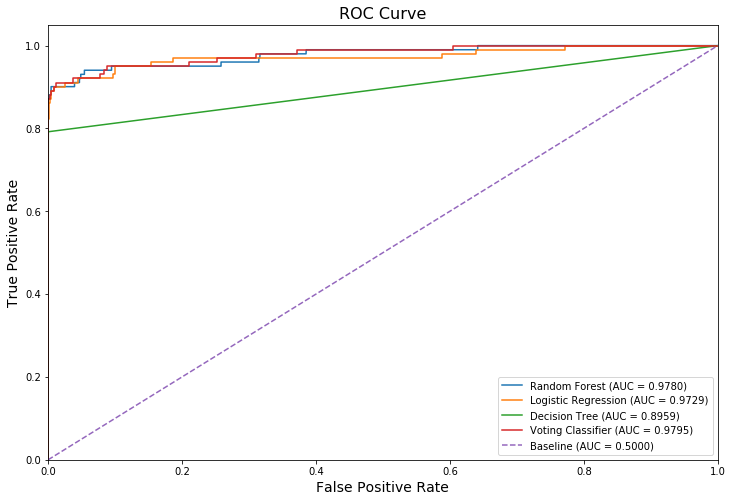

In [79]:
# create ROC curves
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, CV_model.predict_proba(X_test)[:,1])
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
tree_fpr, tree_tpr, tree_thresholds = roc_curve(y_test, tree_model.predict_proba(X_test)[:,1])
ensemble_fpr, ensemble_tpr, ensemble_thresholds = roc_curve(y_test, ensemble_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(12, 8))

# plot Random Forest ROC
plt.plot(fpr, tpr, label="Random Forest (AUC = {:1.4f})".format(roc_auc_score(y_test, CV_model.predict_proba(X_test)[:,1])))
# plot Linear Regression ROC
plt.plot(lr_fpr, lr_tpr, label="Logistic Regression (AUC = {:1.4f})".format(roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])))
# plot Decision Tree ROC
plt.plot(tree_fpr, tree_tpr, label="Decision Tree (AUC = {:1.4f})".format(roc_auc_score(y_test, tree_model.predict_proba(X_test)[:,1])))
# plot Voting Classifier ROC
plt.plot(ensemble_fpr, ensemble_tpr, label="Voting Classifier (AUC = {:1.4f})".format(roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:,1])))
# plot Baseline ROC
plt.plot([0,1], [0,1],label="Baseline (AUC = 0.5000)", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.legend(loc="lower right")
plt.savefig("roc.png", bbox_inches="tight")
plt.show()

## Discussion 
In this project, we have used supervised machine learning techniques to detect fraud cases. By combining the classifiers, we can take the best of multiple models. Random Forest as a standalone model was good in Precision but quite bad in terms of false negatives. Logistic Regression was good in Recall but very bad in terms of false positives. Decision Tree was somewhere in the middle. By combining these models together we indeed managed to improve performance. We have increased the cases of fraud that we are catching from 80 to 82, and reduced false negatives by 2, and we have 1 less false positives as well. If we do care about catching as many fraud cases as we can, whilst keeping the false positives low, this is a pretty good trade-off.

| Model | Precision | Recall | f1-score | Accuracy | AUC ROC | TP | FP | FN | TN |
| - | - | - | - | - | - | - | - | - | - |
| Random Forest | 0.84 | 0.79 | 0.82 | 0.999 | 0.978 | 80 | 15 | 21 | 56846 |
| Logistic Regression | 0.59 | 0.83 | 0.69 | 0.998 | 0.972 | 84 | 58 | 17 | 56803 |
| Decision Tree | 0.79 | 0.79 | 0.79 | 0.999 | 0.895 | 80 | 21 | 21 | 56840 |
| Voting Classifier | 0.85 | 0.81 | 0.83 | 0.999 | 0.979 | 82 | 14 | 19 | 56847 |